<a href="https://colab.research.google.com/github/vanya890/AI_Study_Colab/blob/main/KR1_Kuzyk_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import zipfile

# Подключаем Google Диск
drive.mount('/content/drive')

# Путь к zip-архиву на Google Диске
zip_path = '/content/drive/MyDrive/Neuro/KR1/Avia.zip'

# Путь, куда распаковать архив (в текущую директорию Colab)
extract_path = '/content/'

# Распаковываем архив
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f'Архив {zip_path} успешно распакован в {extract_path}')

Mounted at /content/drive
Архив /content/drive/MyDrive/Neuro/KR1/Avia.zip успешно распакован в /content/


In [2]:
import pandas as pd

# Пути к CSV файлам (после распаковки архива)
train_csv_path = '/content/train.csv'
test_csv_path = '/content/test.csv'

# Чтение CSV файлов с помощью pandas
try:
    train_df = pd.read_csv(train_csv_path)
    test_df = pd.read_csv(test_csv_path)

    # Вывод информации о структуре данных
    print("Структура train.csv:")
    print(train_df.info())
    print("\nПервые 5 строк train.csv:")
    print(train_df.head())


    print("\n\nСтруктура test.csv:")
    print(test_df.info())
    print("\nПервые 5 строк test.csv:")
    print(test_df.head())

except FileNotFoundError:
    print("Ошибка: Один или оба CSV файла не найдены. Убедитесь, что архив распакован правильно.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Структура train.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location     

In [3]:
import pandas as pd

# Пути к CSV файлам
train_csv_path = '/content/train.csv'
test_csv_path = '/content/test.csv'

try:
    train_df = pd.read_csv(train_csv_path)
    test_df = pd.read_csv(test_csv_path)

    # Удаление пропусков
    train_df.dropna(inplace=True)  # inplace=True изменяет DataFrame напрямую
    test_df.dropna(inplace=True)

    # Удаление дубликатов
    train_df.drop_duplicates(inplace=True)
    test_df.drop_duplicates(inplace=True)

    # Вывод информации о структуре данных после удаления пропусков и дубликатов
    print("Структура train.csv после обработки:")
    print(train_df.info())

    print("\n\nСтруктура test.csv после обработки:")
    print(test_df.info())


    # Сохранение обработанных данных (опционально)
    train_df.to_csv('/content/train_cleaned.csv', index=False) # index=False чтобы не сохранять индексы
    test_df.to_csv('/content/test_cleaned.csv', index=False)
    print("\nОбработанные данные сохранены в train_cleaned.csv и test_cleaned.csv")


except FileNotFoundError:
    print("Ошибка: Один или оба CSV файла не найдены.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Структура train.csv после обработки:
<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate lo

In [4]:
# prompt: Все текстовые колонки (не int) преобразовать с помощью вектора классов

from google.colab import drive
import zipfile
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Подключаем Google Диск
drive.mount('/content/drive')

# ... (остальной код без изменений)

try:
    train_df = pd.read_csv(train_csv_path)
    test_df = pd.read_csv(test_csv_path)

    # Удаление пропусков и дубликатов (без изменений)
    train_df.dropna(inplace=True)
    test_df.dropna(inplace=True)
    train_df.drop_duplicates(inplace=True)
    test_df.drop_duplicates(inplace=True)


    # Применение Label Encoding к текстовым колонкам
    label_encoders = {}  # Словарь для хранения кодировщиков для каждой колонки

    for column in train_df.columns:
        if train_df[column].dtype == 'object':  # Проверяем тип данных колонки
            le = LabelEncoder()
            # Объединяем значения из train и test для обучения кодировщика
            le.fit(pd.concat([train_df[column], test_df[column]], axis=0))
            train_df[column] = le.transform(train_df[column])
            test_df[column] = le.transform(test_df[column])
            label_encoders[column] = le # Сохраняем кодировщик

    # Вывод информации о структуре данных после обработки
    print("Структура train.csv после обработки:")
    print(train_df.info())

    print("\n\nСтруктура test.csv после обработки:")
    print(test_df.info())

    # Сохранение обработанных данных
    train_df.to_csv('/content/train_encoded.csv', index=False)
    test_df.to_csv('/content/test_encoded.csv', index=False)
    print("\nОбработанные данные сохранены в train_encoded.csv и test_encoded.csv")

except FileNotFoundError:
    print("Ошибка: Один или оба CSV файла не найдены.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Структура train.csv после обработки:
<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  int64  
 3   Customer Type                      103594 non-null  int64  
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  int64  
 6   Class                              103594 non-null  int64  
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departur

In [5]:
# prompt: Вывести 5 первых элементов

print(train_df.head())

   Unnamed: 0      id  Gender  Customer Type  Age  Type of Travel  Class  \
0           0   70172       1              0   13               1      2   
1           1    5047       1              1   25               0      0   
2           2  110028       0              0   26               0      0   
3           3   24026       0              0   25               0      0   
4           4  119299       1              0   61               0      0   

   Flight Distance  Inflight wifi service  Departure/Arrival time convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ...  Inflight entertainment  On-board service  Leg room ser

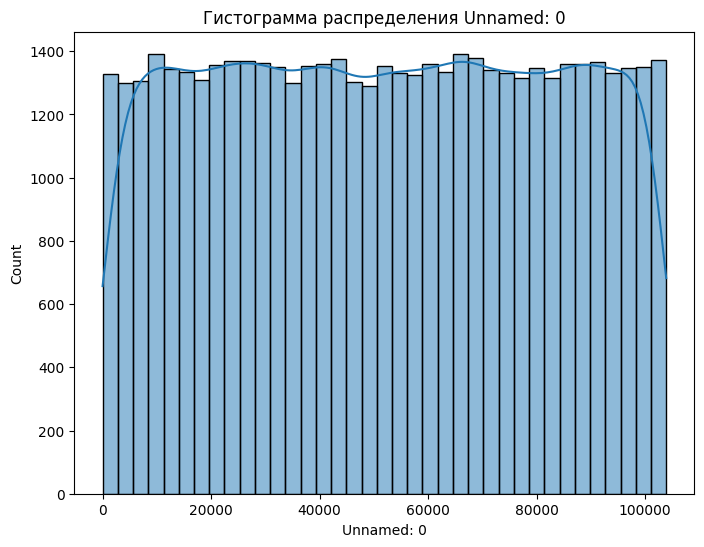

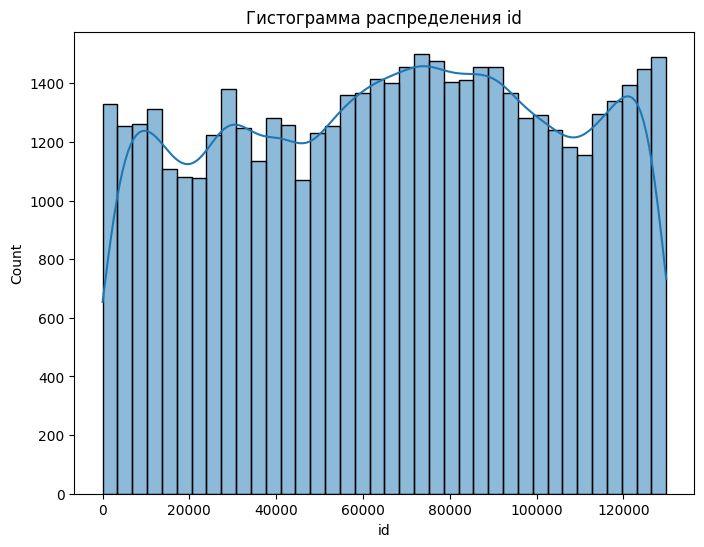

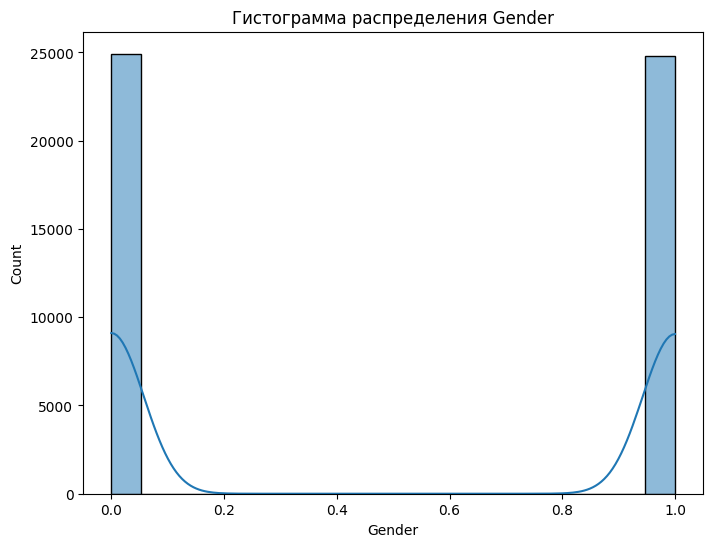

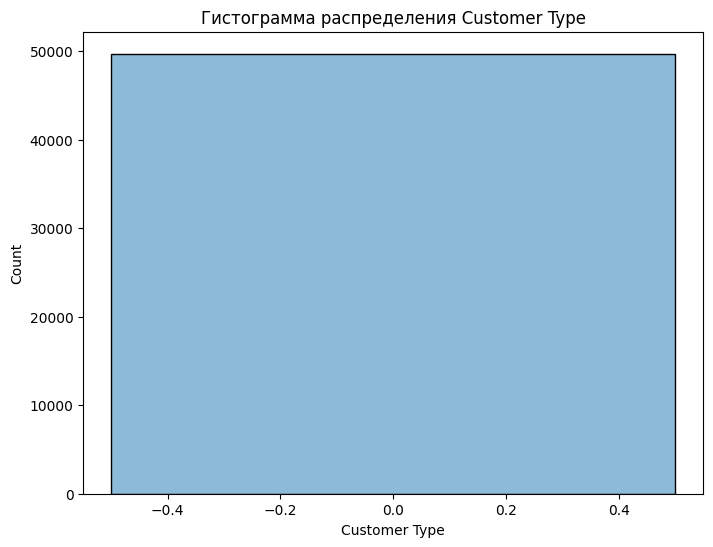

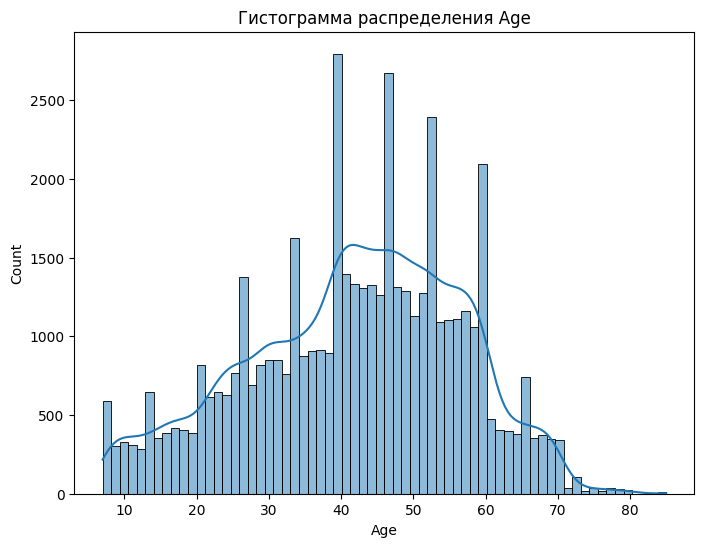

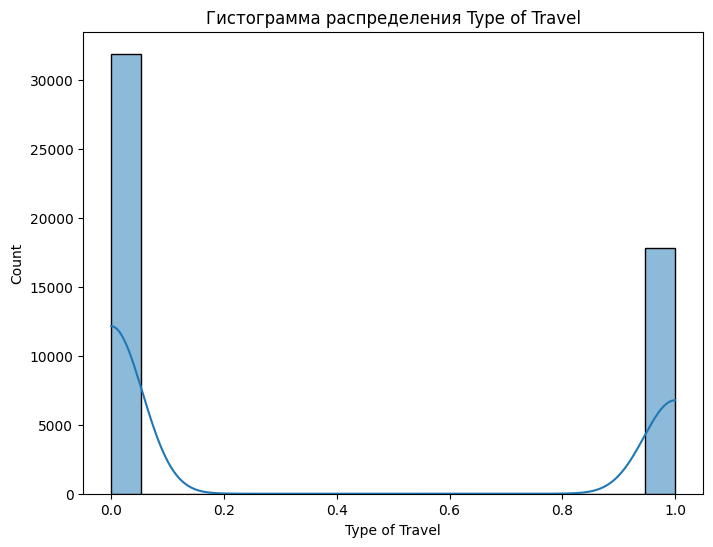

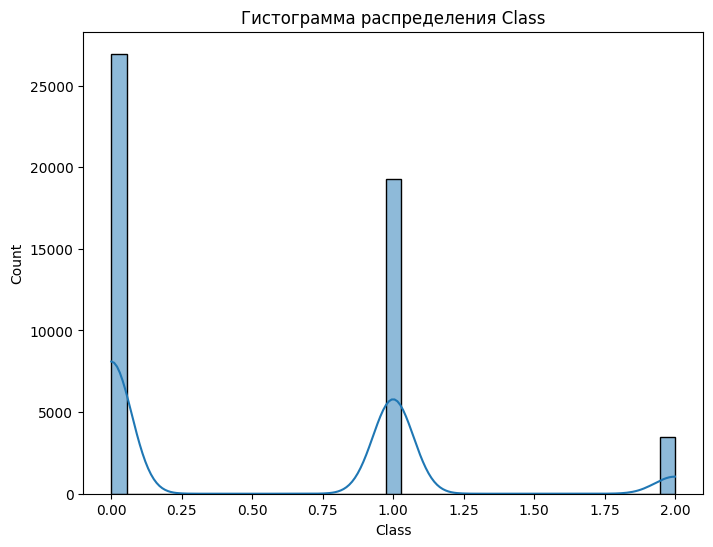

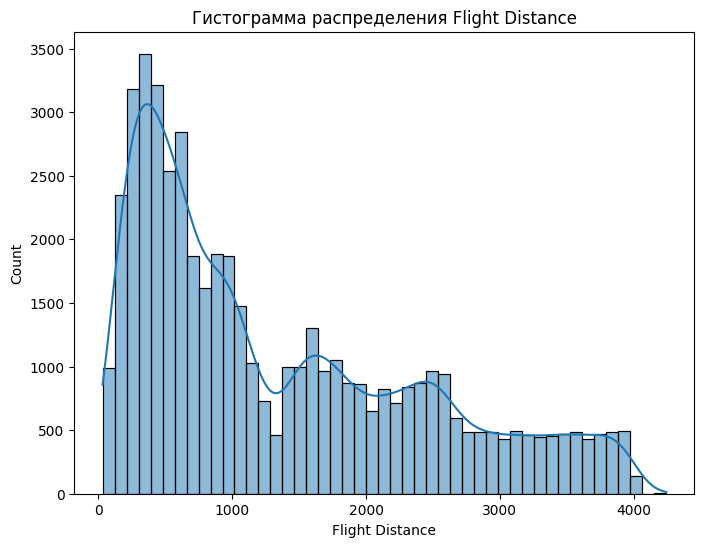

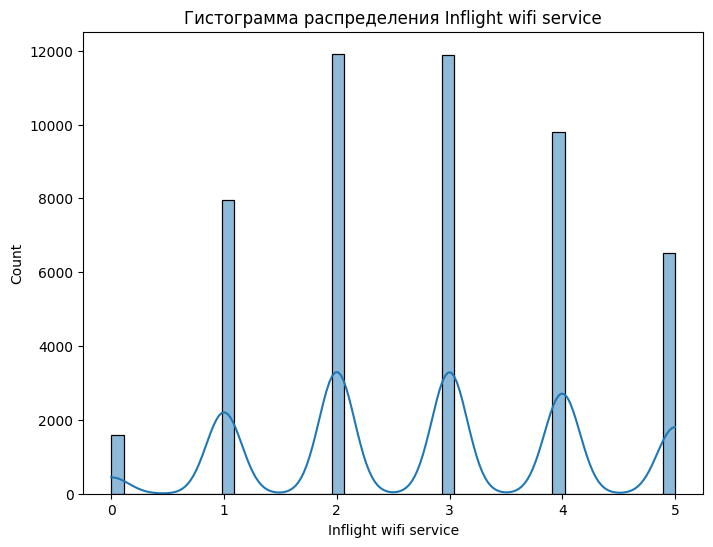

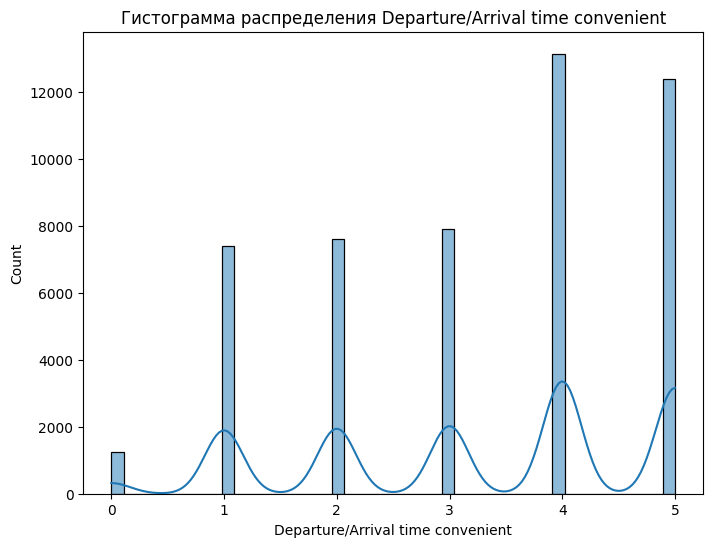

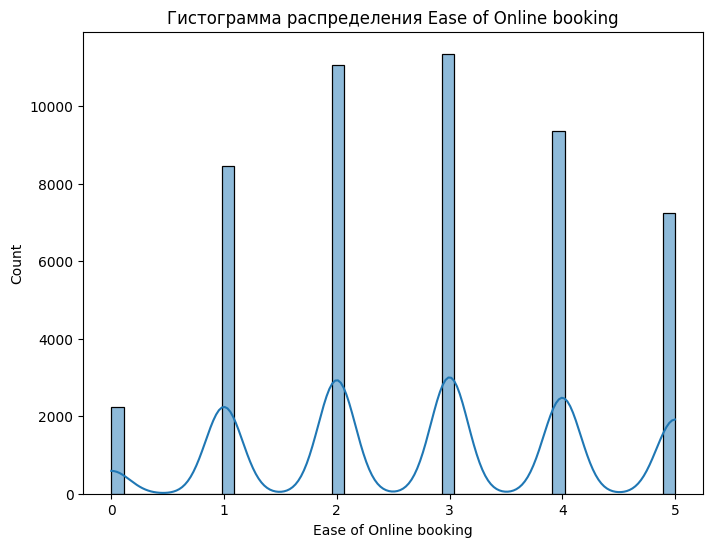

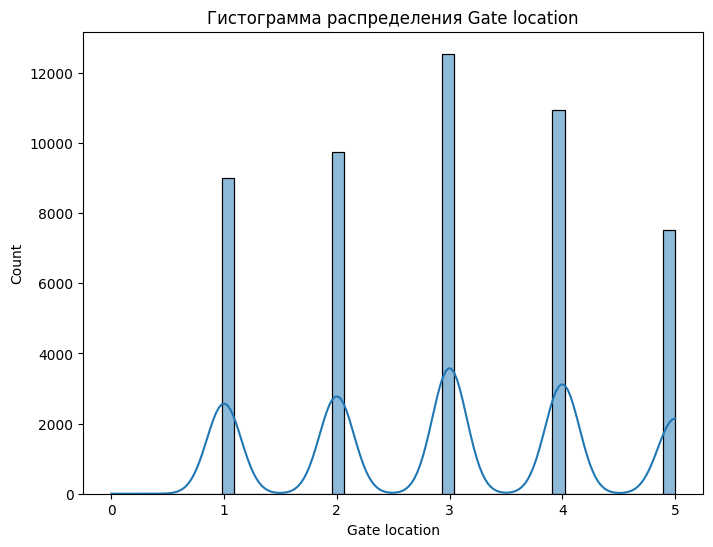

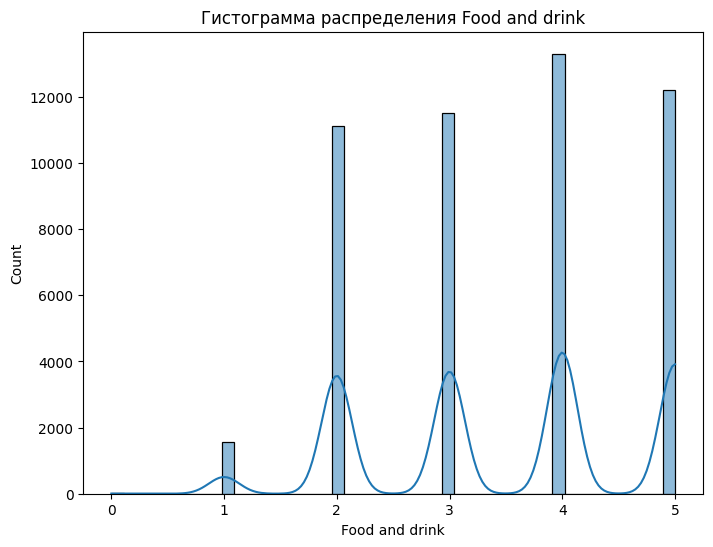

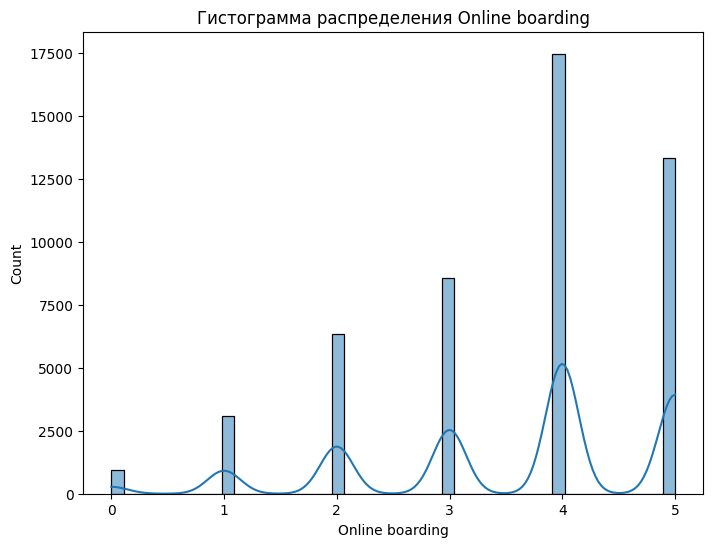

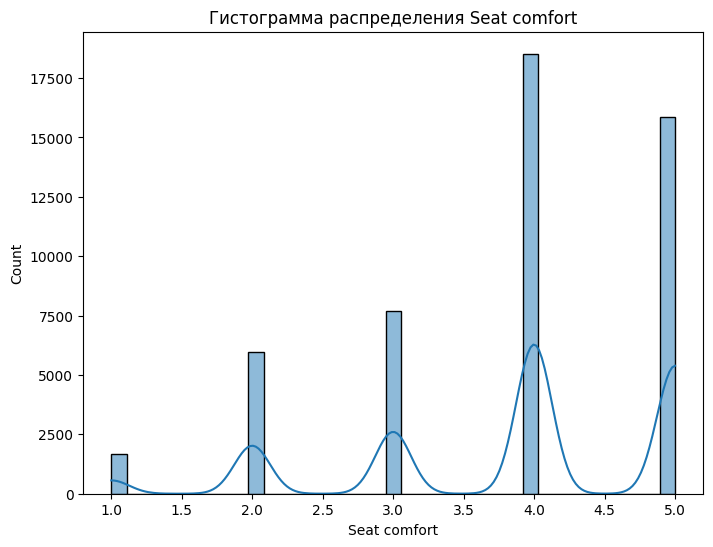

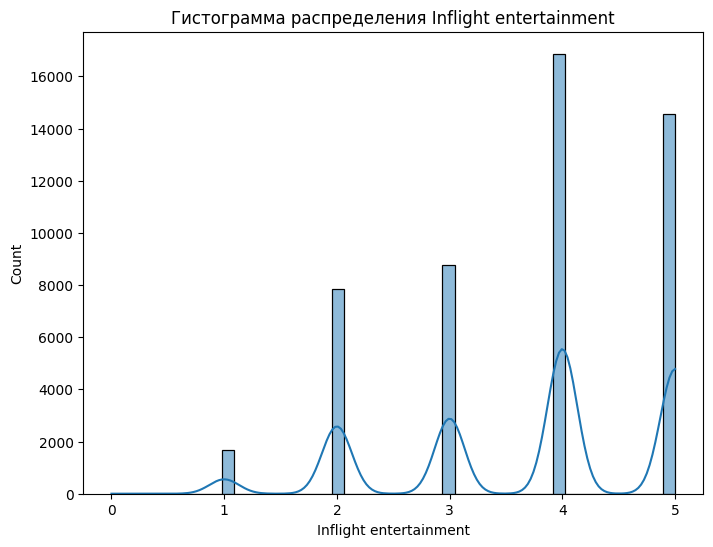

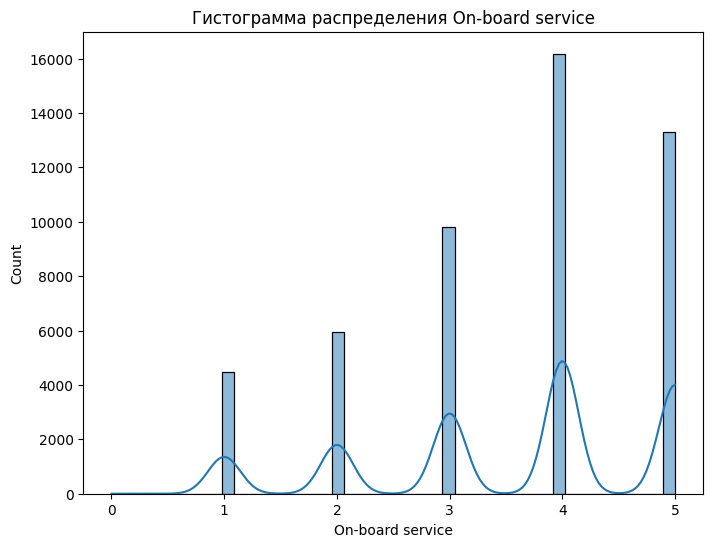

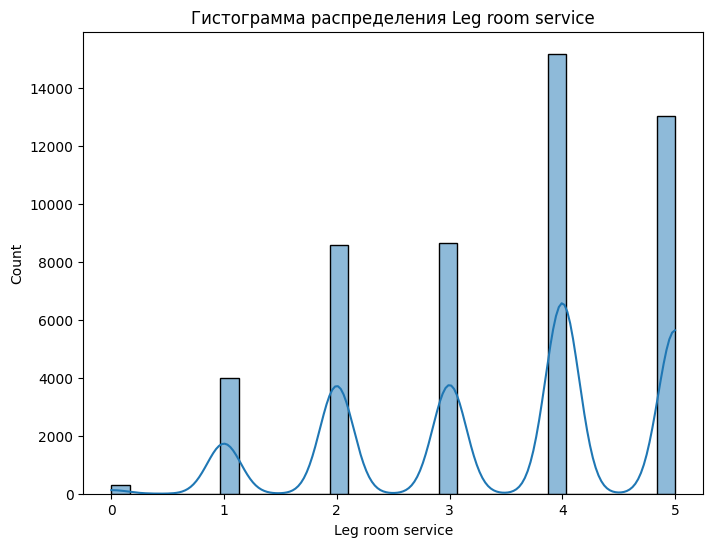

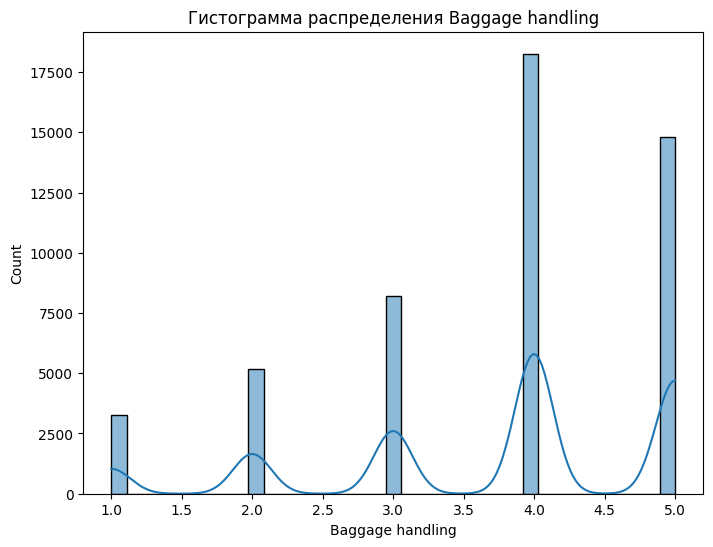

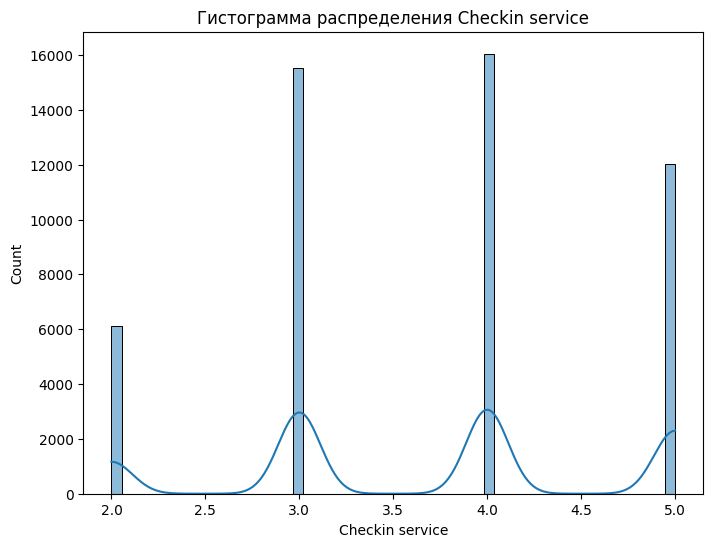

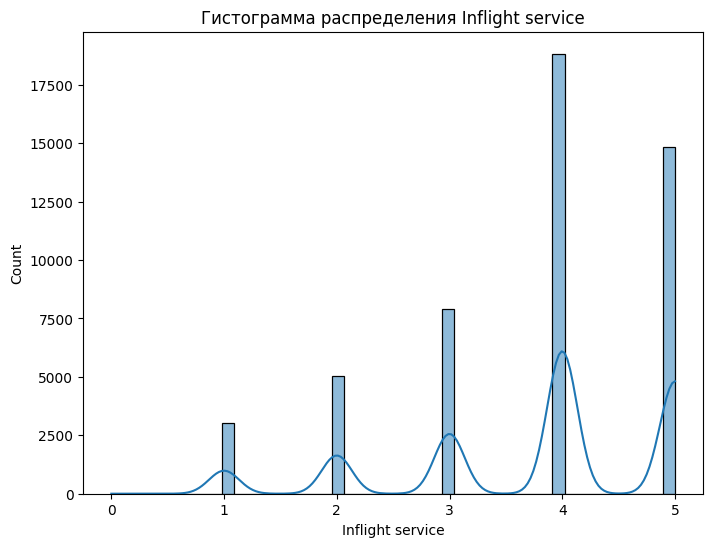

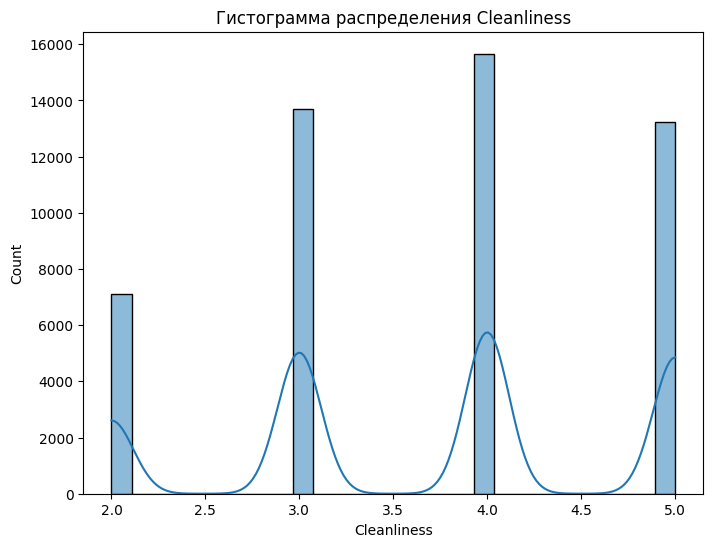

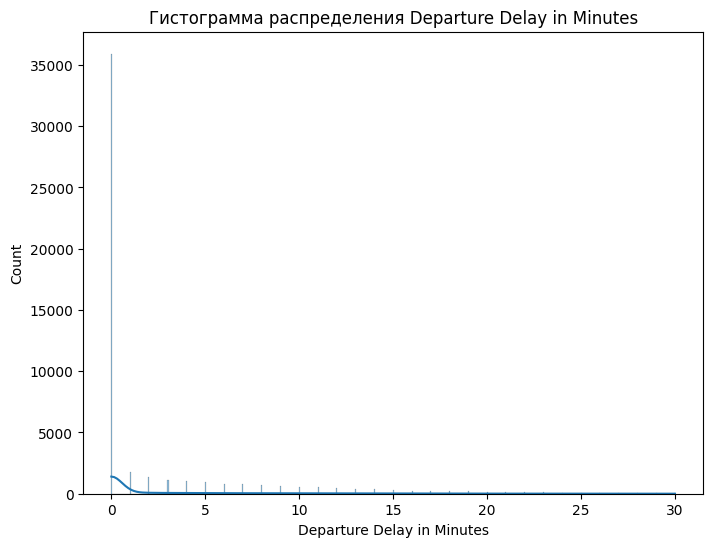

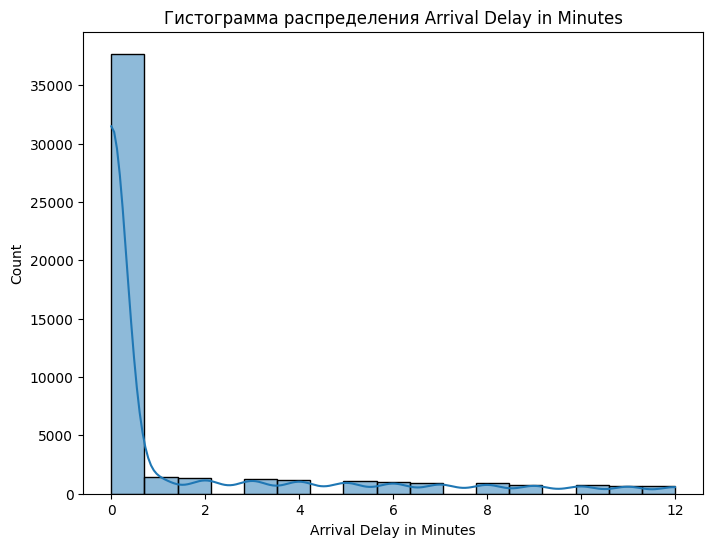

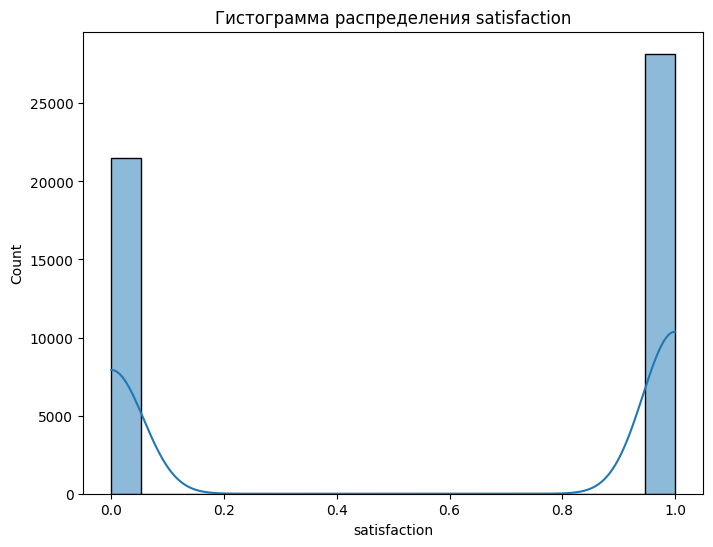

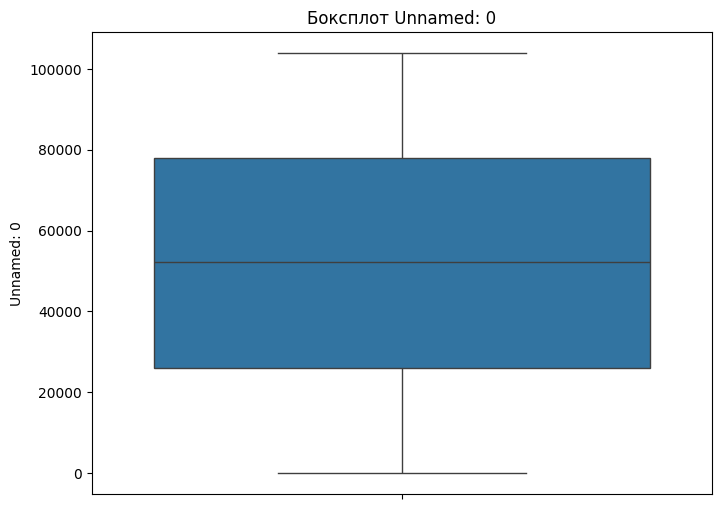

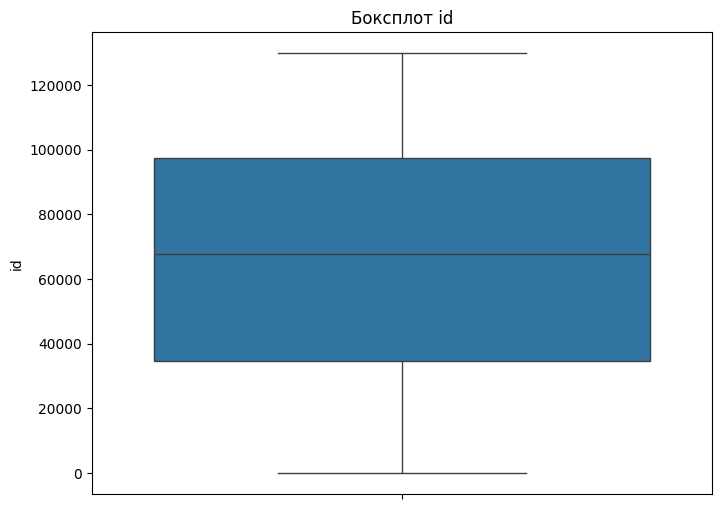

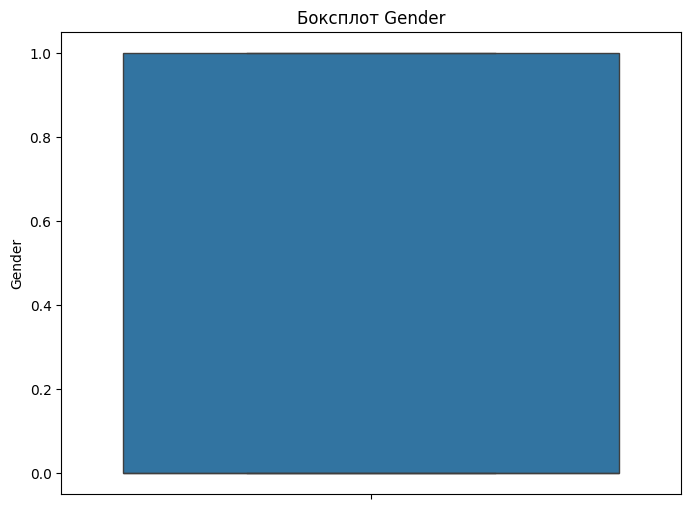

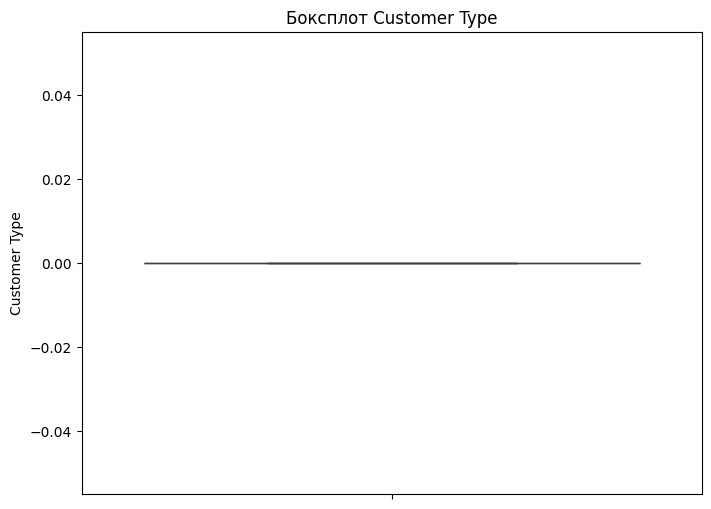

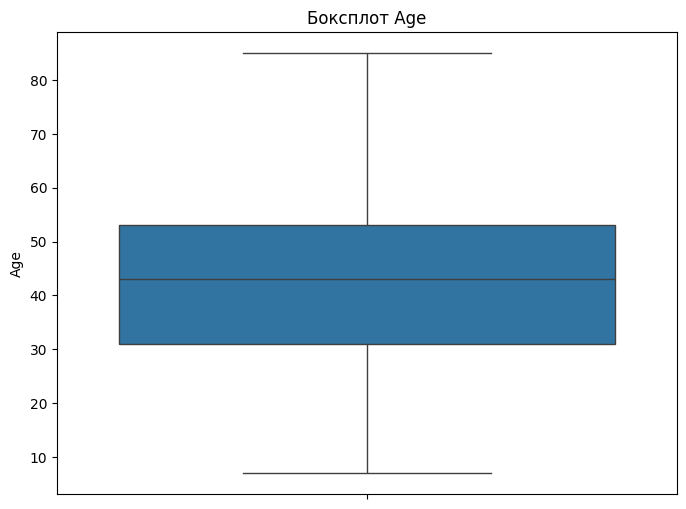

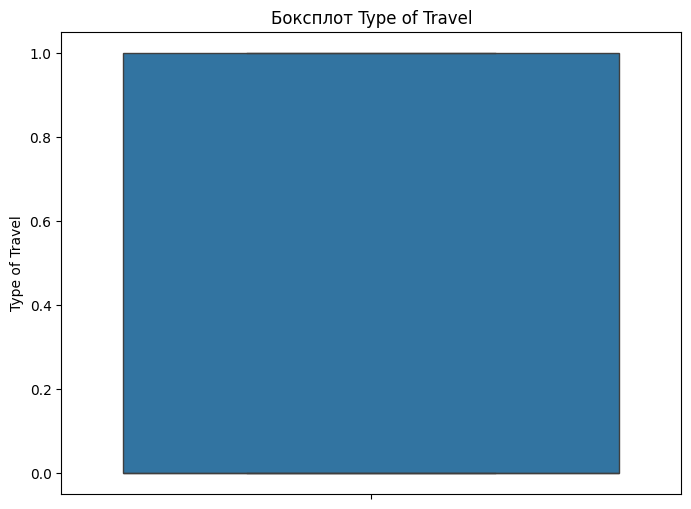

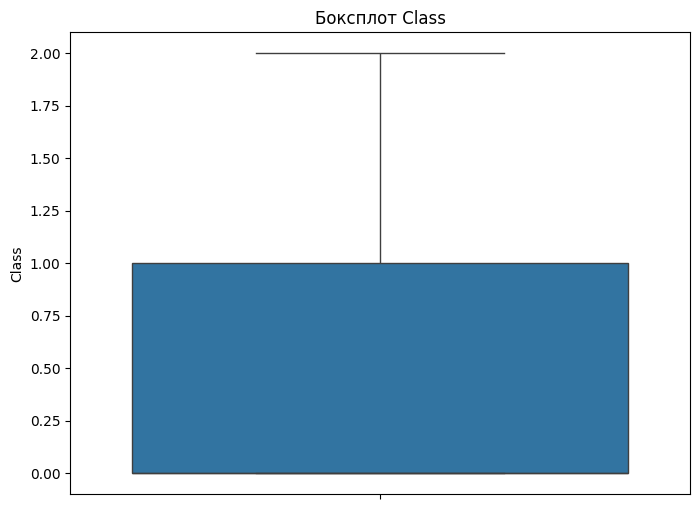

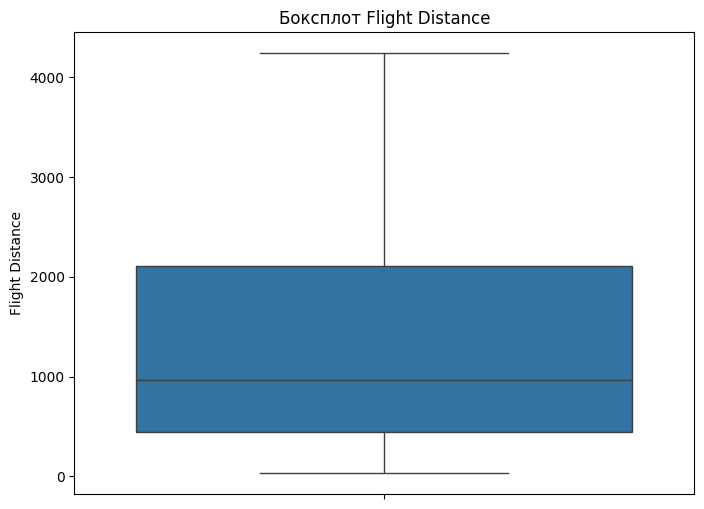

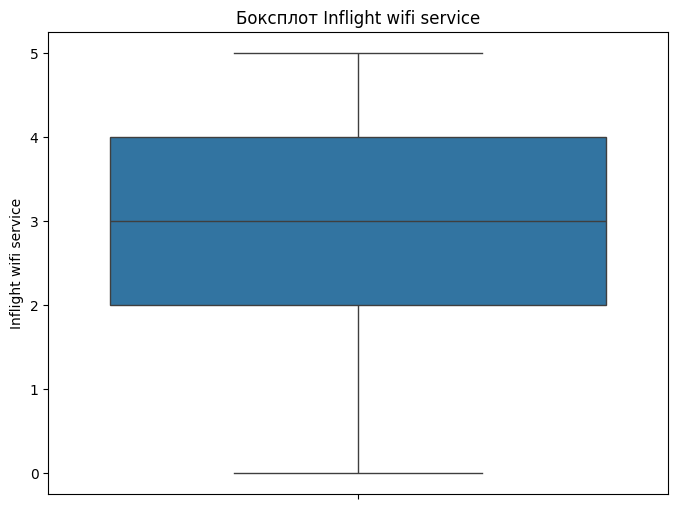

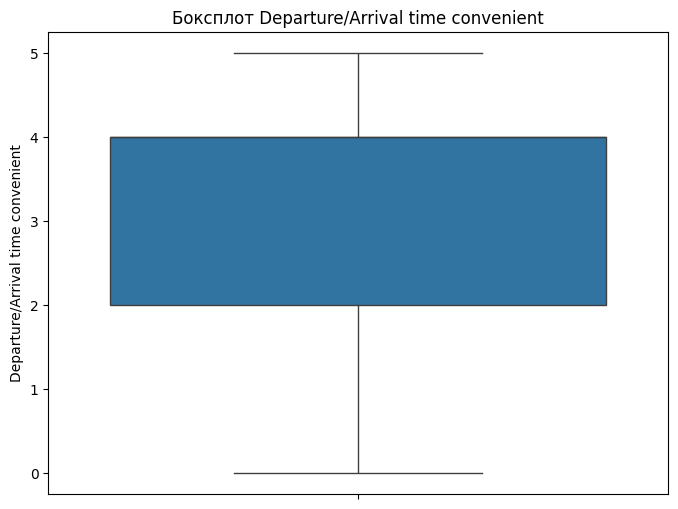

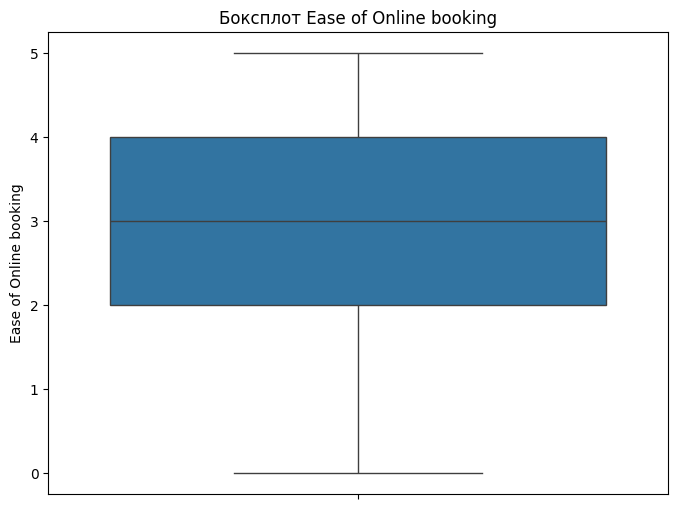

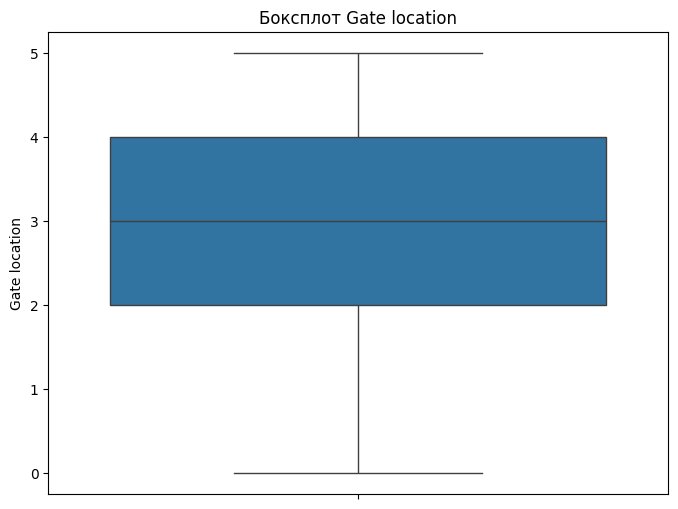

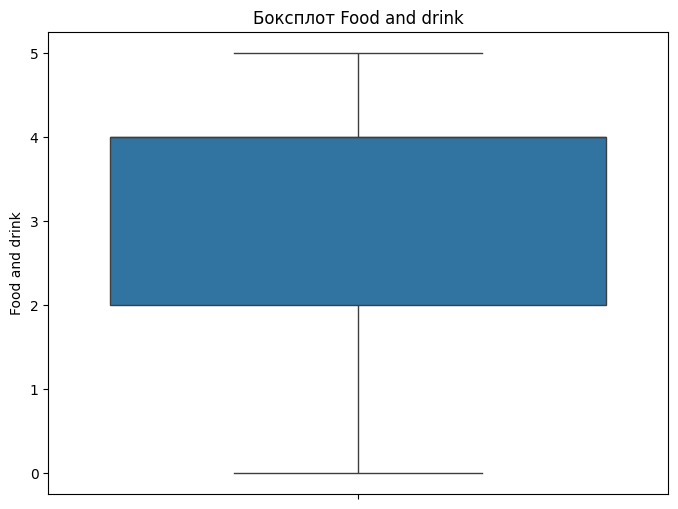

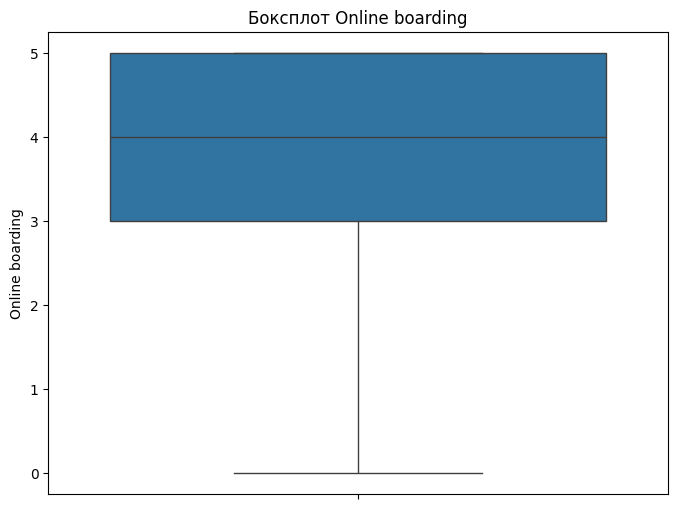

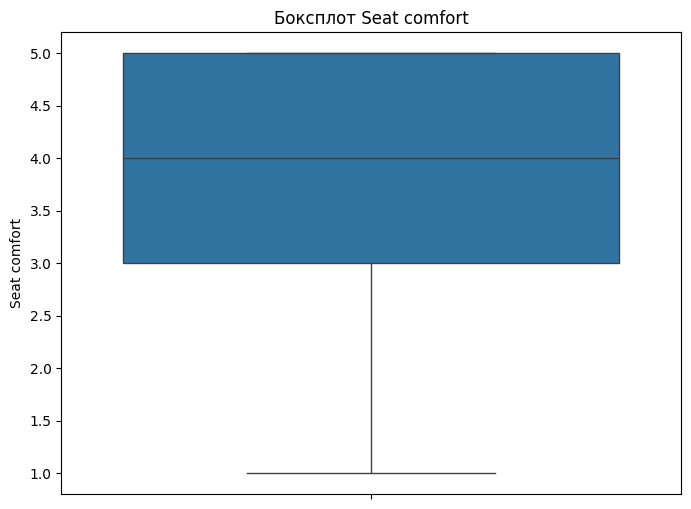

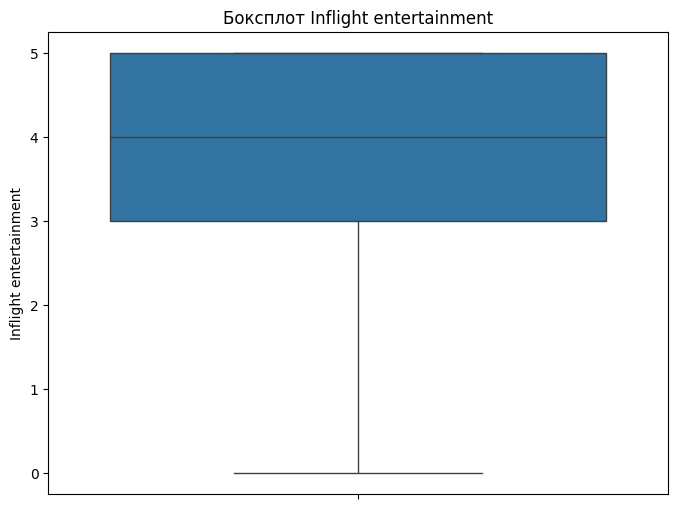

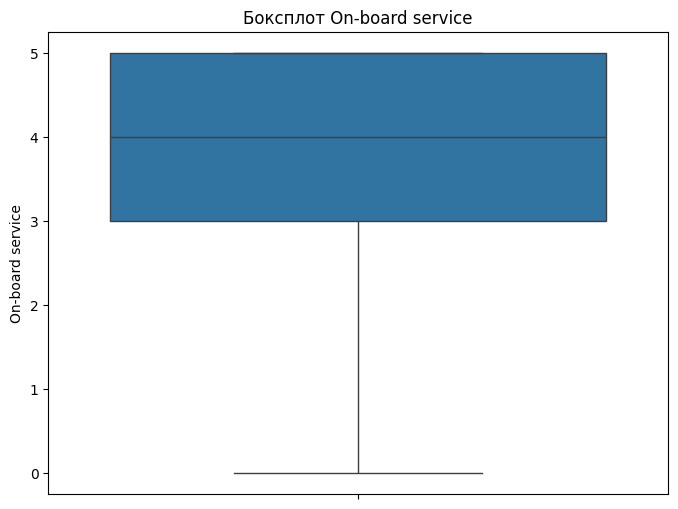

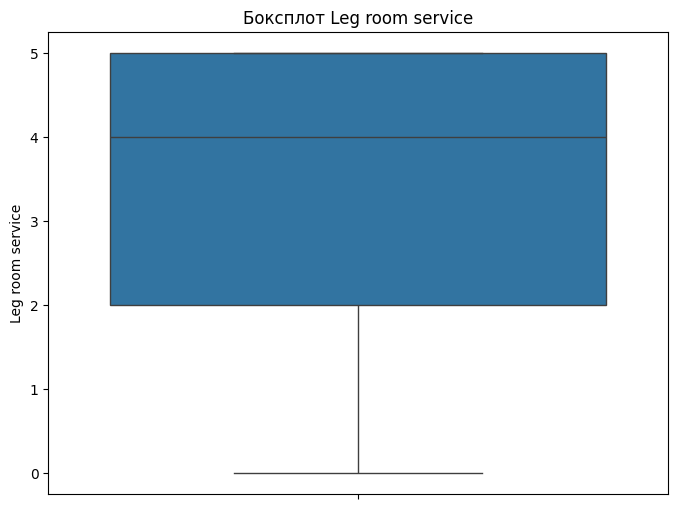

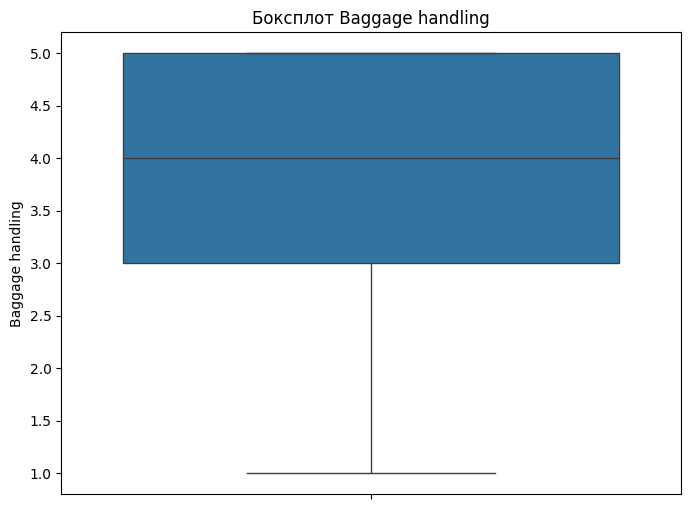

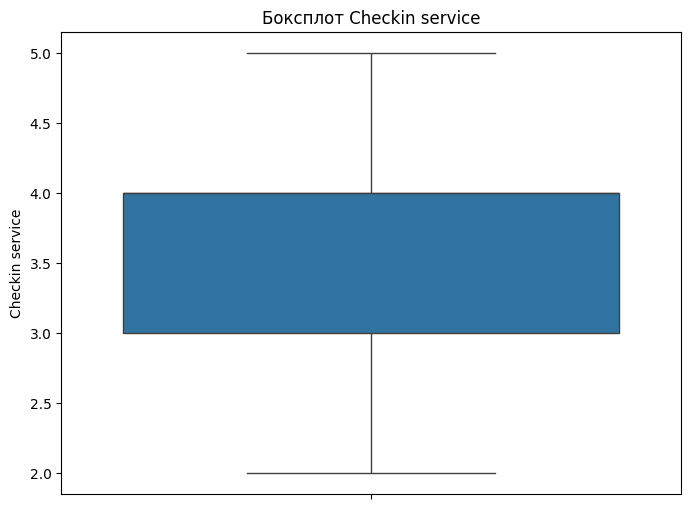

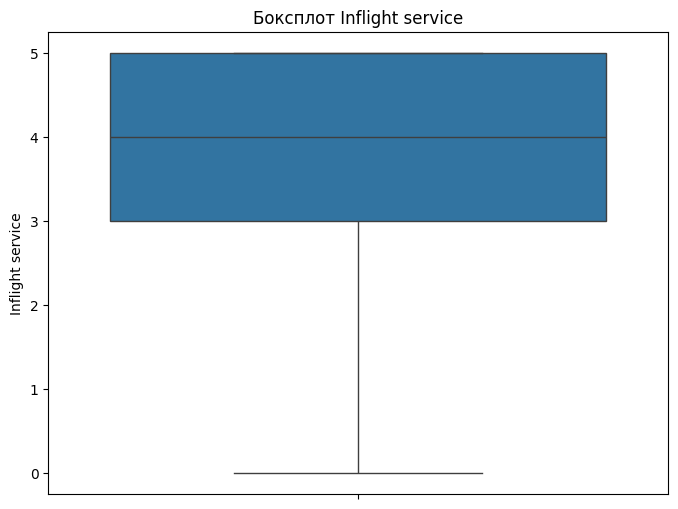

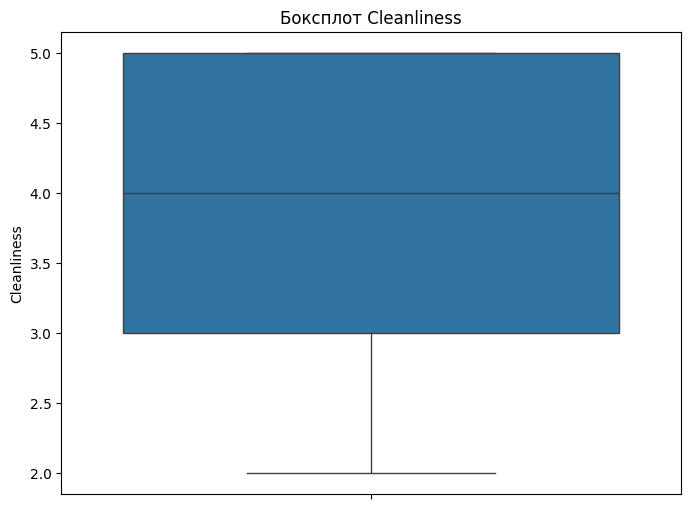

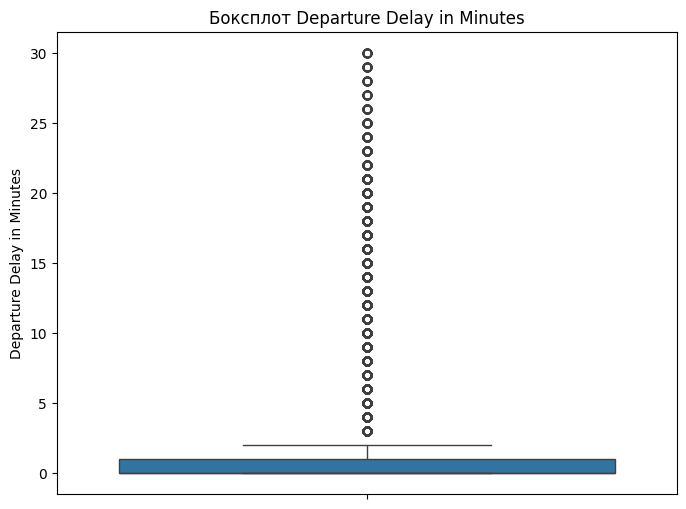

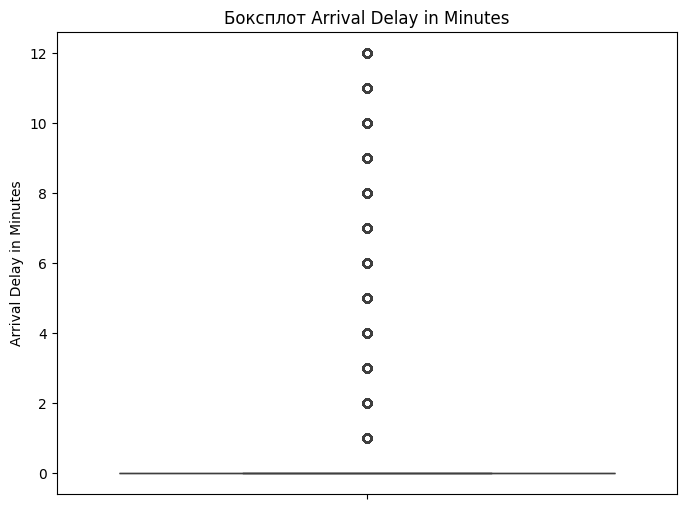

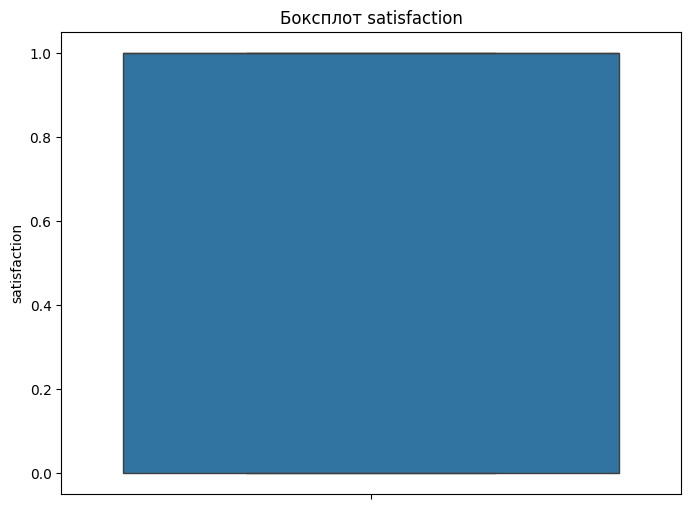

In [6]:
# prompt: Удалить выбросы. Построить гистограммы распределения и боксплоты для параметров.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (предыдущий код)

try:
    train_df = pd.read_csv('/content/train_encoded.csv')

    # Определение выбросов с помощью IQR
    for col in train_df.select_dtypes(include=['number']):  # Только для числовых столбцов
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Удаление выбросов
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

    # Гистограммы
    for col in train_df.select_dtypes(include=['number']):
        plt.figure(figsize=(8, 6))
        sns.histplot(train_df[col], kde=True)
        plt.title(f'Гистограмма распределения {col}')
        plt.show()

    # Боксплоты
    for col in train_df.select_dtypes(include=['number']):
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=train_df[col])
        plt.title(f'Боксплот {col}')
        plt.show()

except FileNotFoundError:
    print("Ошибка: Файл train_encoded.csv не найден.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

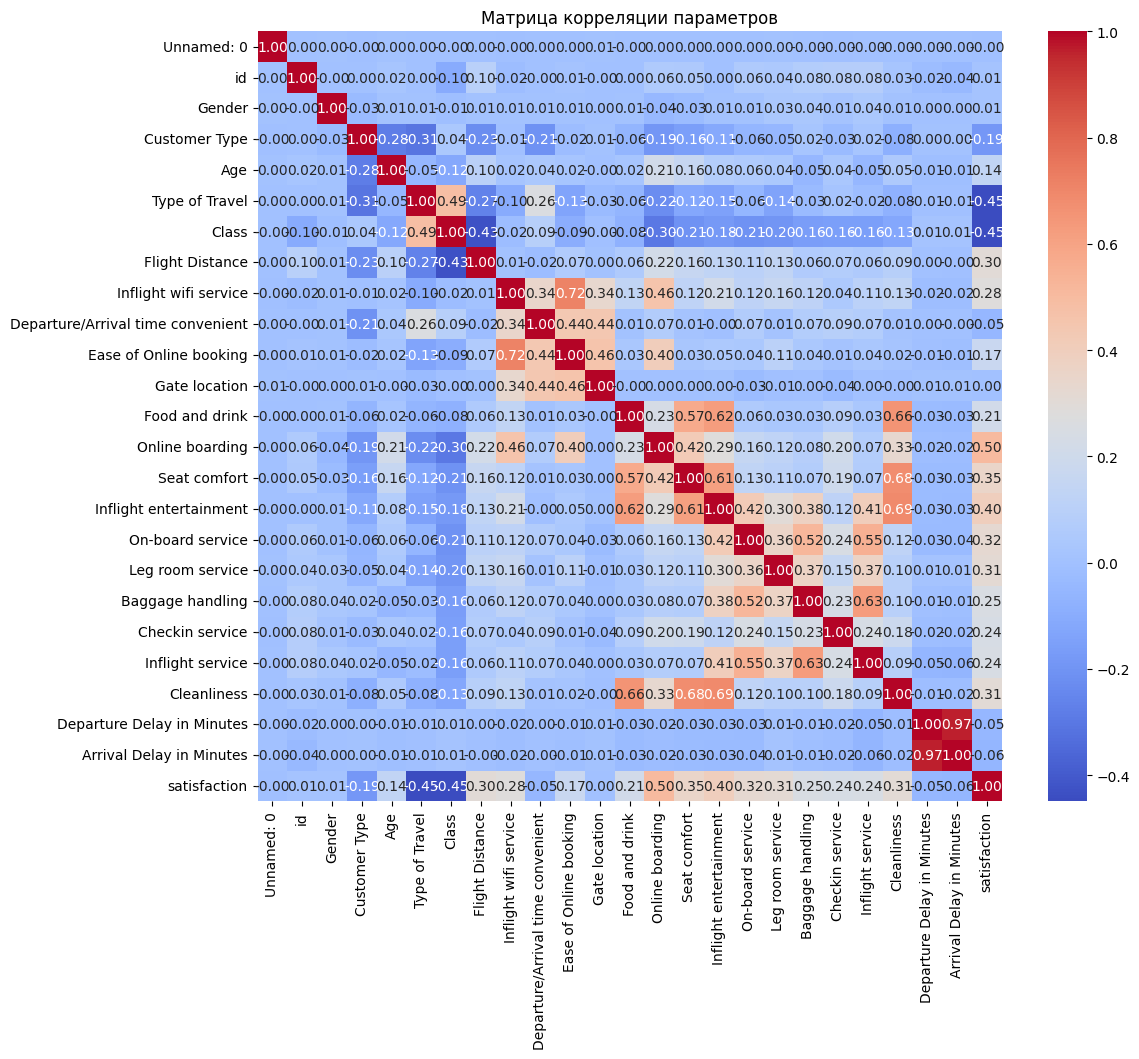

In [7]:
# prompt: Построить матрицу корреляции для параметров.

try:
    train_df = pd.read_csv('/content/train_encoded.csv')

    # Матрица корреляции
    correlation_matrix = train_df.corr()

    # Визуализация матрицы корреляции
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Матрица корреляции параметров')
    plt.show()

except FileNotFoundError:
    print("Ошибка: Файл train_encoded.csv не найден.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

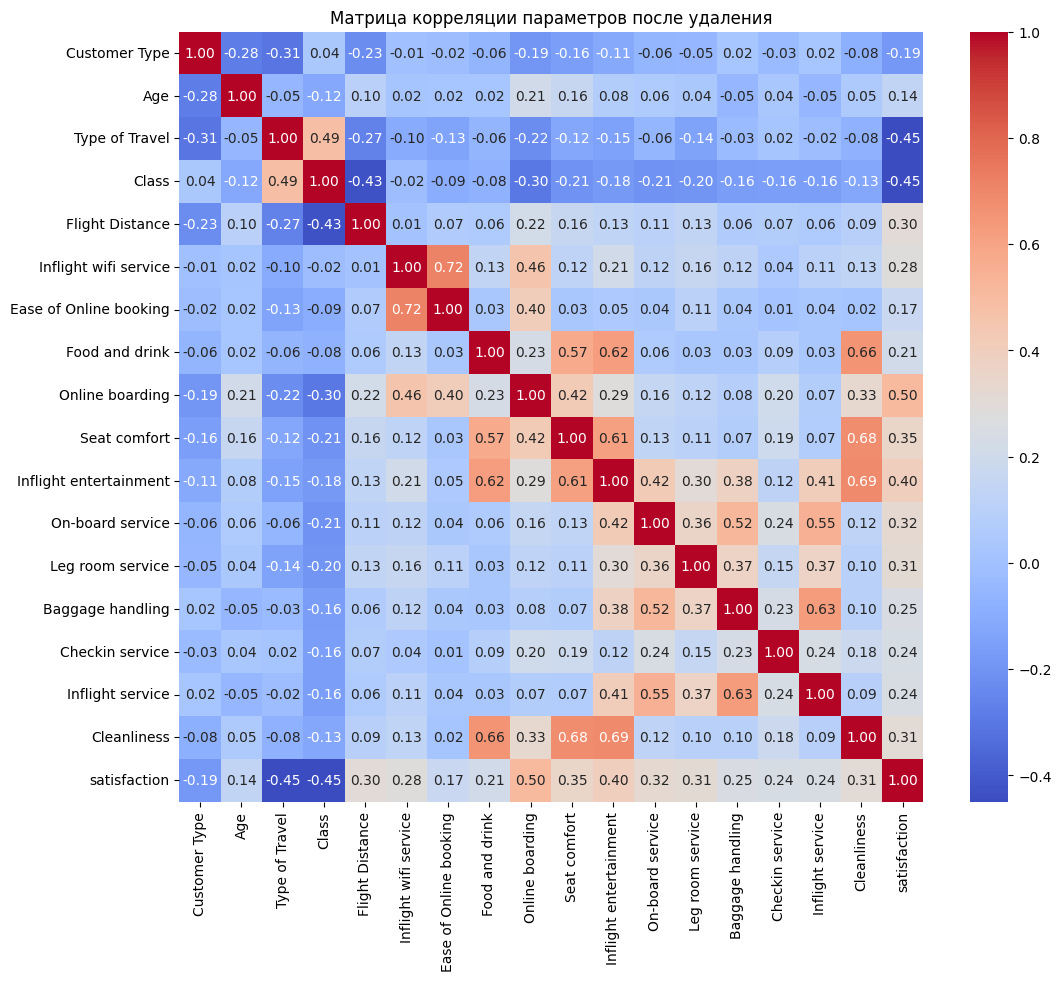

In [8]:
# prompt: Удалить параметры с низким показателем корреляции с целевым признаком (satisfaction). Снова выведи матрицу.

try:
    train_df = pd.read_csv('/content/train_encoded.csv')

    # Матрица корреляции
    correlation_matrix = train_df.corr()

    # Порог корреляции
    threshold = 0.1  # Пример, можно изменить

    # Находим параметры с низкой корреляцией с 'satisfaction'
    low_correlation_features = correlation_matrix[abs(correlation_matrix['satisfaction']) < threshold].index

    # Удаляем параметры с низкой корреляцией
    train_df = train_df.drop(columns=low_correlation_features)

    # Снова вычисляем и визуализируем матрицу корреляции
    correlation_matrix = train_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Матрица корреляции параметров после удаления')
    plt.show()

except FileNotFoundError:
    print("Ошибка: Файл train_encoded.csv не найден.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

In [9]:
# prompt: Создайте   2 архитектуры сети(Используй drop и batchnormalization). Тренеруем предсказывать satisfaction

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

try:
    train_df = pd.read_csv('/content/train_encoded.csv')

    # Assuming 'satisfaction' is your target variable
    X = train_df.drop('satisfaction', axis=1)
    y = train_df['satisfaction']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Architecture 1
    model1 = Sequential()
    model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(32, activation='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.3))
    model1.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model1.summary()
    history1 = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


    # Architecture 2
    model2 = Sequential()
    model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.4))
    model2.add(Dense(64, activation='relu'))
    model2.add(BatchNormalization())
    model2.add(Dropout(0.2))
    model2.add(Dense(1, activation='sigmoid'))

    model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model2.summary()
    history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


except FileNotFoundError:
    print("Error: train_encoded.csv not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5615 - loss: 0.7253 - val_accuracy: 0.6453 - val_loss: 0.6438
Epoch 2/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.6453 - loss: 0.6459 - val_accuracy: 0.6674 - val_loss: 0.6312
Epoch 3/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6494 - loss: 0.6400 - val_accuracy: 0.6595 - val_loss: 0.6290
Epoch 4/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6847 - loss: 0.5995 - val_accuracy: 0.7045 - val_loss: 0.5710
Epoch 5/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7202 - loss: 0.5543 - val_accuracy: 0.7918 - val_loss: 0.4716
Epoch 6/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7184 - loss: 0.5539 - val_accuracy: 0.6520 - val_loss: 0.6256
Epoch 7/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7210 - loss: 0.5484 - val_accuracy: 0.8133 - val_loss: 0.4411
Epoch 8/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7283 - loss: 0.54

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 11,905 (46.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5885 - loss: 0.7027 - val_accuracy: 0.6642 - val_loss: 0.6390
Epoch 2/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6517 - loss: 0.6417 - val_accuracy: 0.6405 - val_loss: 0.6471
Epoch 3/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6652 - loss: 0.6215 - val_accuracy: 0.5926 - val_loss: 0.7747
Epoch 4/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6902 - loss: 0.5893 - val_accuracy: 0.6994 - val_loss: 0.5685
Epoch 5/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7263 - loss: 0.5451 - val_accuracy: 0.8089 - val_loss: 0.4660
Epoch 6/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7361 - loss: 0.5294 - val_accuracy: 0.7706 - val_loss: 0.4961
Epoch 7/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7533 - loss: 0.5115 - val_accuracy: 0.8196 - val_loss: 0.4267
Epoch 8/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7524 - loss: 0.5112

In [11]:
# prompt: Выбрать лучшую модель и вывести её структуру

# Evaluate the models
loss1, accuracy1 = model1.evaluate(X_val, y_val, verbose=0)
loss2, accuracy2 = model2.evaluate(X_val, y_val, verbose=0)

print(f"Model 1 Accuracy: {accuracy1}")
print(f"Model 2 Accuracy: {accuracy2}")

# Choose the best model based on accuracy
if accuracy1 > accuracy2:
    best_model = model1
    print("Model 1 is the best model.")
    best_model.summary()
else:
    best_model = model2
    print("Model 2 is the best model.")
    best_model.summary()

Model 1 Accuracy: 0.7993146181106567
Model 2 Accuracy: 0.7383561134338379
Model 1 is the best model.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,909 (46.52 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 7,812 (30.52 KB)

In [18]:
# prompt: Проверить лучшую модель и заставить её предсказывать по файлу test.scv (без учета satisfaction). Вывести Accuracy

import pandas as pd
from sklearn.metrics import accuracy_score

try:
    test_df = pd.read_csv('/content/test_encoded.csv')
    X_test = test_df.drop('satisfaction', axis=1)
    y_test = test_df['satisfaction']

    # Predict using the best model
    y_pred = (best_model.predict(X_test) > 0.5).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test data: {accuracy}")

except FileNotFoundError:
    print("Error: test_encoded.csv not found.")
except Exception as e:
    print(f"An error occurred: {e}")

810/810 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy on test data: 0.8314602402193643
